In [55]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

# %matplotlib.inline
plt.rcParams['figure.figsize'] = (12,8)

In [56]:
df = pd.read_csv("movies.csv.zip")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [57]:
df.shape

(7668, 15)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [59]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [60]:
# pd.set_option('display.float_format', '{:.2f}'.format)  # Hiển thị 2 số sau dấu phẩy

## Data Cleaning

### Missing value

In [61]:
df.isnull().sum().sort_values(ascending = False)

# for col in df.columns:
#     pct_missing = np.mean(df[col].isnull())
#     print('{} - {}%'.format(col, pct_missing))

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [62]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False)

budget      28.312467
gross        2.464789
rating       1.004173
company      0.221701
runtime      0.052165
score        0.039124
votes        0.039124
writer       0.039124
country      0.039124
released     0.026082
star         0.013041
name         0.000000
genre        0.000000
year         0.000000
director     0.000000
dtype: float64

In [63]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<AxesSubplot: >

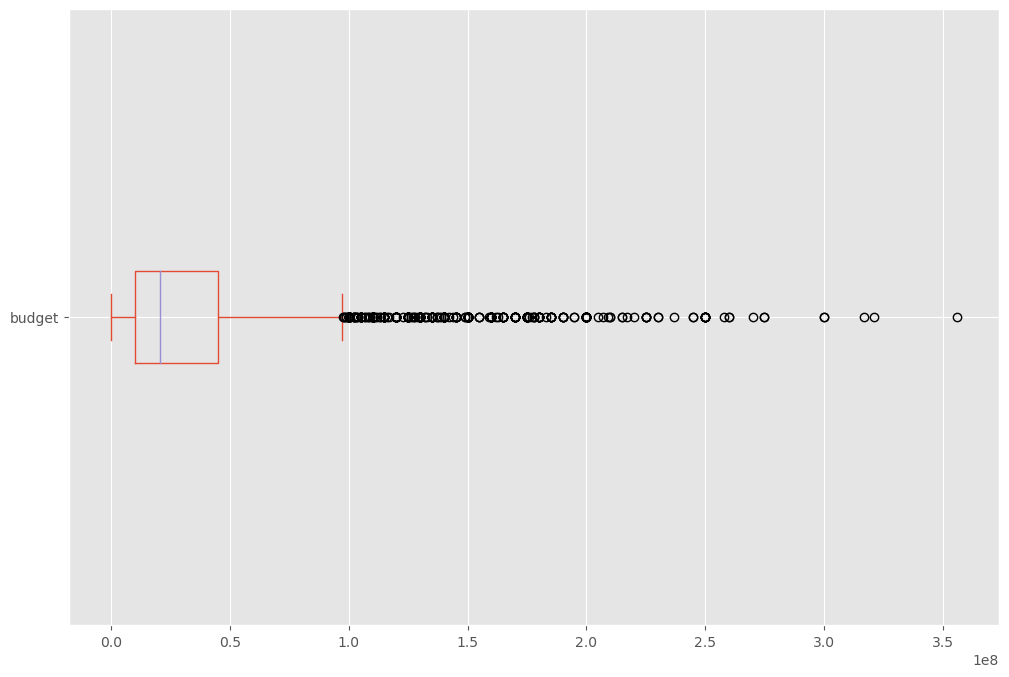

In [64]:
#budget
df['budget'].plot.box(vert = False)

In [65]:
#fill null = median because budget data has outliers - trung vị ít bị ảnh hưởng bởi ourlier hơn trung bình
# df['budget'].median()
df['budget'].fillna(df['budget'].median(), inplace = True)
# df['budget'].isna().sum()

<AxesSubplot: >

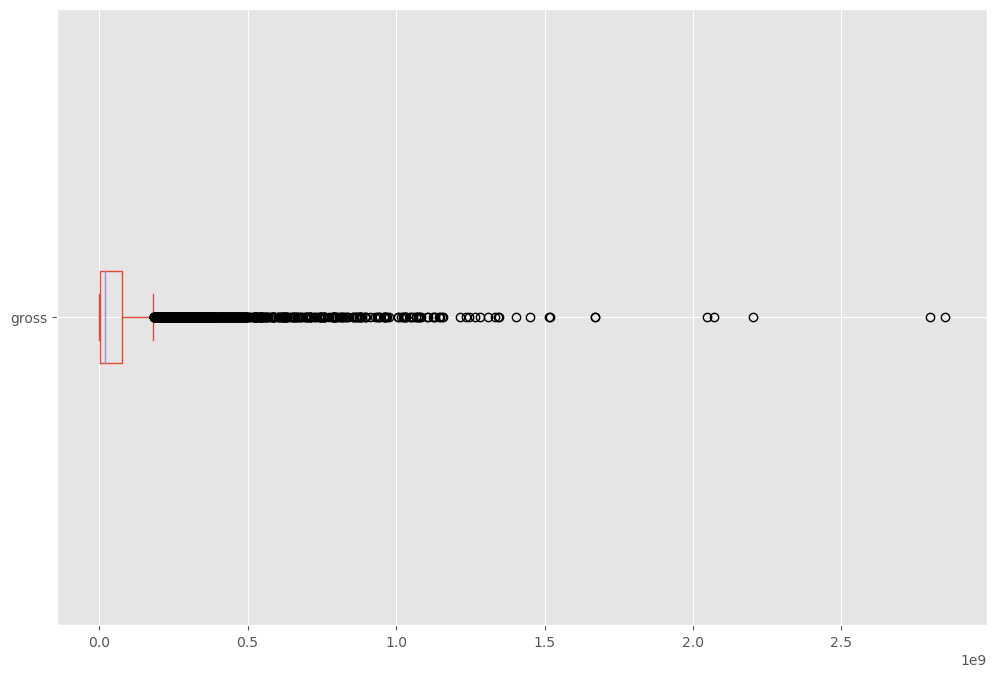

In [66]:
#gross
df['gross'].plot.box(vert = False)

In [67]:
#1.fill null = median or
#2.delete null because %null of gross = 2.5%(too small)
df.dropna(subset = 'gross', inplace = True)
df['gross'].isna().sum()

0

In [68]:
#company & rating
# fill null = mode
df['rating'].fillna(df['rating'].mode()[0], inplace = True)
df['company'].fillna(df['company'].mode()[0], inplace = True)

In [69]:
#delete null of rest columns
df.dropna(inplace = True)

In [70]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### Duplicated

In [71]:
df.duplicated().sum()

0

### Change data type

In [72]:
# change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [73]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [74]:
# df['years'] = df['released'].str.extract(r'(\d{4})')

In [75]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


## Data Visualization 

#### Correclation

In [76]:
df[['year','score','votes','budget','gross','runtime']].corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.092038,0.216142,0.289949,0.257560,0.114987
score,0.092038,1.000000,0.413149,0.058146,0.186244,0.397294
votes,0.216142,0.413149,1.000000,0.458326,0.630842,0.309475
budget,0.289949,0.058146,0.458326,1.000000,0.745643,0.272847
gross,0.257560,0.186244,0.630842,0.745643,1.000000,0.245139
runtime,0.114987,0.397294,0.309475,0.272847,0.245139,1.000000


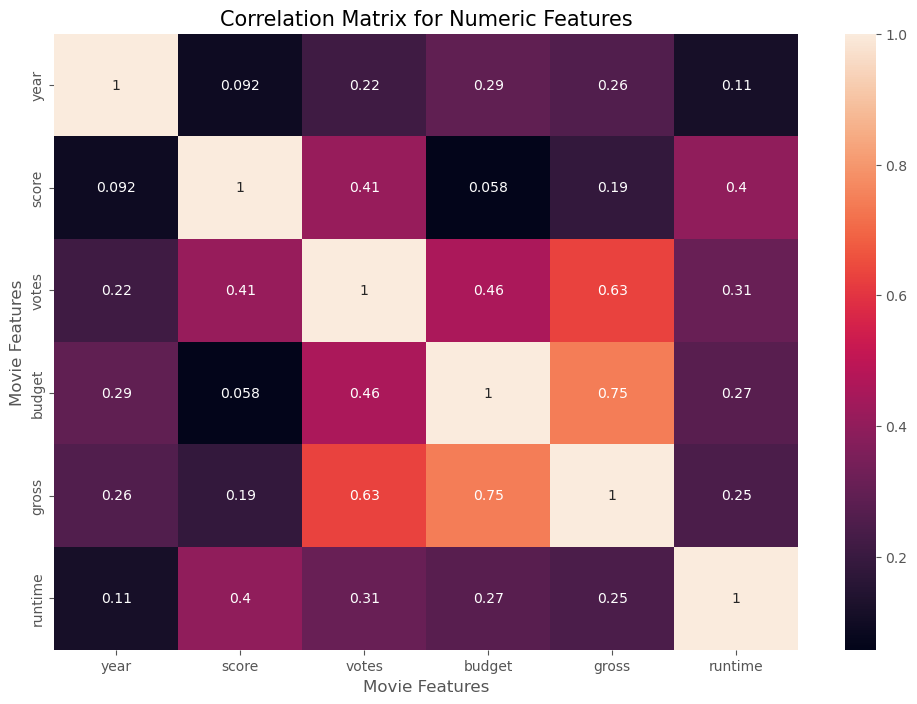

In [122]:
sns.heatmap(df[['year','score','votes','budget','gross','runtime']].corr(), annot = True)

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numeric Features',fontsize = 15)
plt.show()

#### Rating

In [78]:
sort = df['rating'].value_counts().index

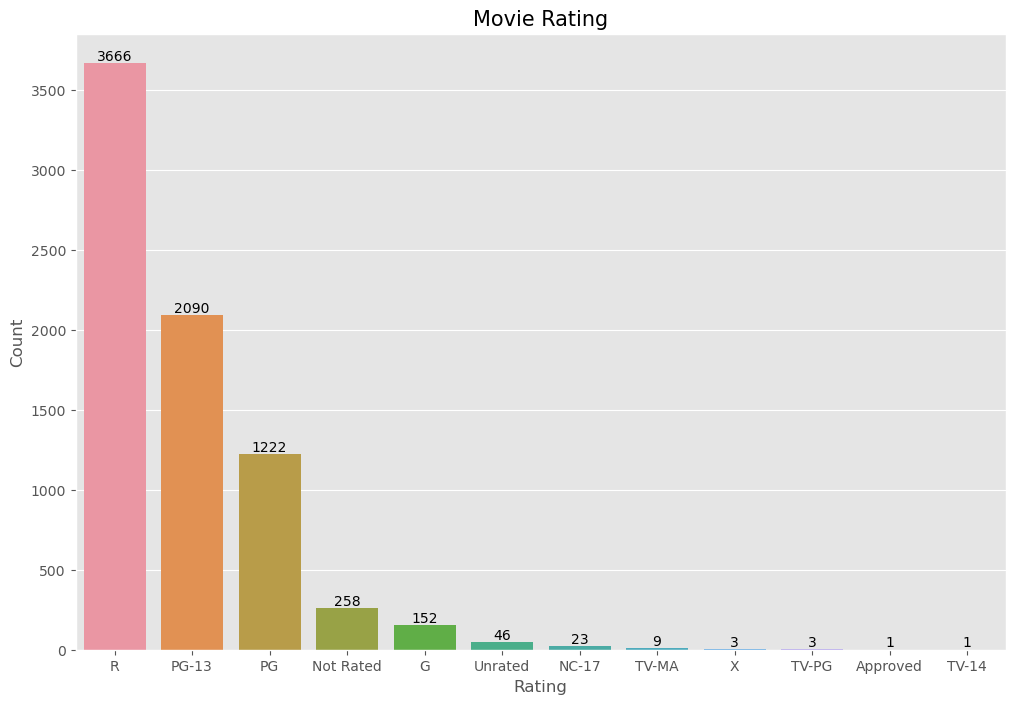

In [123]:
ax = sns.countplot(data=df, x="rating", order = sort)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Giá trị count
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Vị trí nhãn
                ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Movie Rating',fontsize = 15)
plt.show()

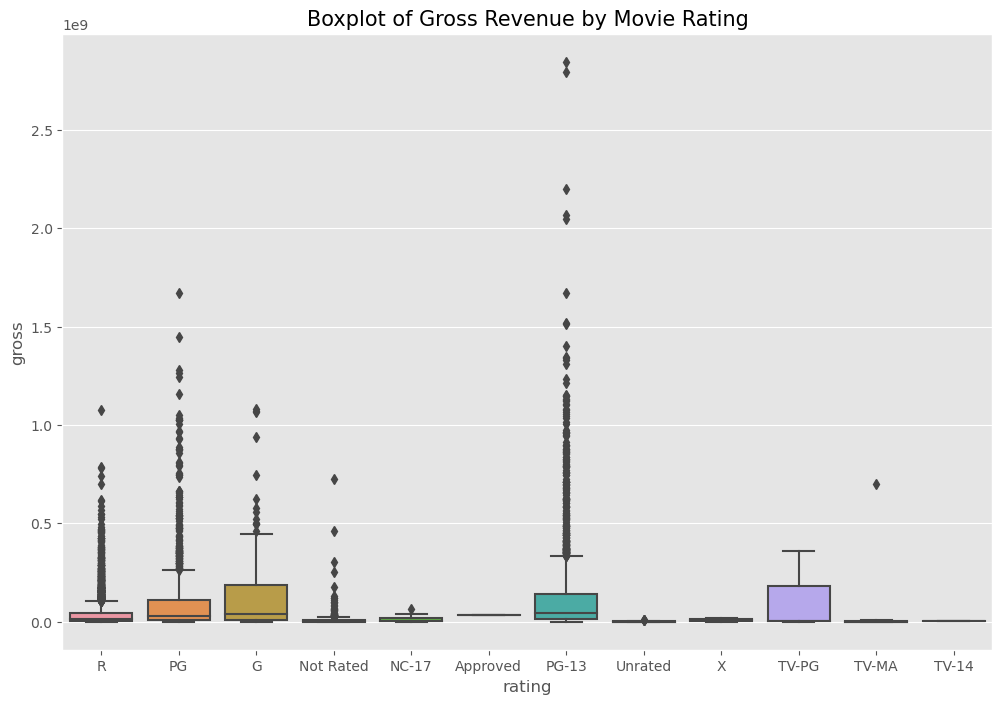

In [124]:
sns.boxplot(x='rating', y='gross', data=df)
plt.title("Boxplot of Gross Revenue by Movie Rating",fontsize = 15)
plt.show()

#### Genre

In [81]:
df['genre'].value_counts()

Comedy       2191
Action       1672
Drama        1467
Crime         542
Biography     433
Adventure     420
Animation     334
Horror        306
Fantasy        43
Mystery        20
Thriller       12
Family         11
Romance         8
Sci-Fi          8
Western         3
Musical         2
Music           1
Sport           1
Name: genre, dtype: int64

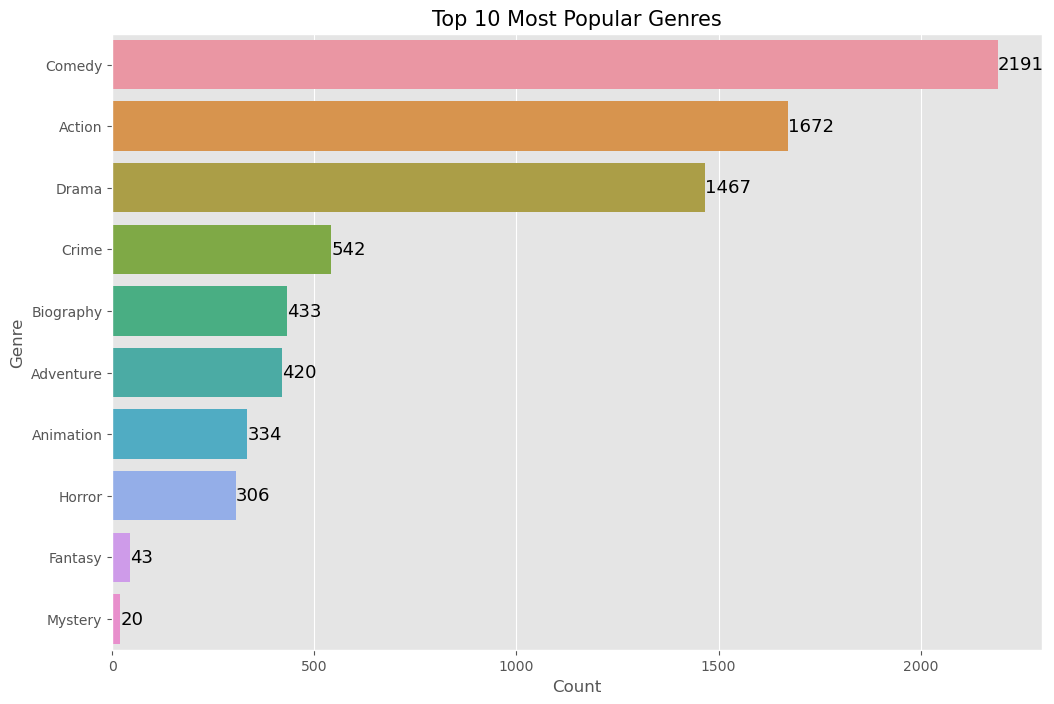

In [125]:
top_10_genres = df['genre'].value_counts().nlargest(10)
ax = sns.barplot(x=top_10_genres.values, y=top_10_genres.index)
for i, v in enumerate(top_10_genres.values):
    ax.text(v + 0.5, i, str(v), ha='left', va='center', fontsize=13)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Most Popular Genres',fontsize = 15)
plt.show()

#### Year

In [83]:
df['year'].value_counts().sort_index()

1980     81
1981    104
1982    119
1983    128
1984    158
1985    177
1986    186
1987    188
1988    191
1989    189
1990    190
1991    196
1992    190
1993    198
1994    198
1995    197
1996    199
1997    199
1998    194
1999    195
2000    196
2001    200
2002    200
2003    200
2004    200
2005    200
2006    199
2007    200
2008    199
2009    200
2010    197
2011    199
2012    199
2013    200
2014    200
2015    199
2016    200
2017    200
2018    200
2019    195
2020     14
Name: year, dtype: int64

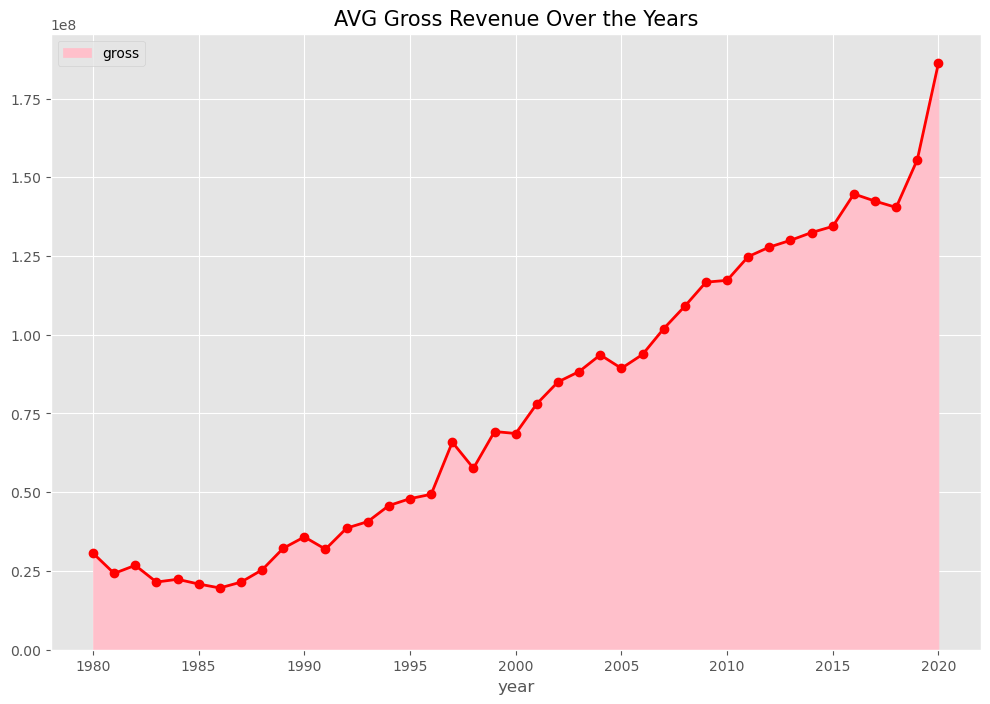

In [126]:
df_grouped = df.groupby('year')['gross'].mean().reset_index()
df_grouped.plot.area(x='year', y='gross', color = 'pink')
plt.plot(df_grouped['year'], df_grouped['gross'], color='red', linewidth=2, marker='o', markersize=6)
plt.title("AVG Gross Revenue Over the Years",fontsize = 15)
plt.show()

- Tổng doanh thu từ phim ảnh qua mỗi năm tăng dần
- Từ 1980 - 1986, tổng doanh thu đa phần giảm sút, nguyên nhân do:
    + khủng hoảng kinh tế đầu thập niên 1980 khiến người dân cắt giảm chi tiêu giải trí.
    + sự trỗi dậy của máy chiếu VHS và băng cassette khiến nhiều người chọn xem phim tại nhà thay vì ra rạp.
    + lạm phát cao khiến giá vé tăng, làm giảm số lượng khán giả đến rạp.
    + tuy nhiên giữa thập niên 1980, ngành công nghiệp điện ảnh phục hồi với những bom tấn như E.T. the Extra-Terrestrial (1982), Ghostbusters (1984), và Top Gun (1986), nhờ vào chiến lược tiếp thị tốt hơn và sự trở lại của các thương hiệu lớn.

#### score

In [183]:
mean_score = df['score'].mean()
median_score = df['score'].median()
mode_score = df['score'].mode()[0]

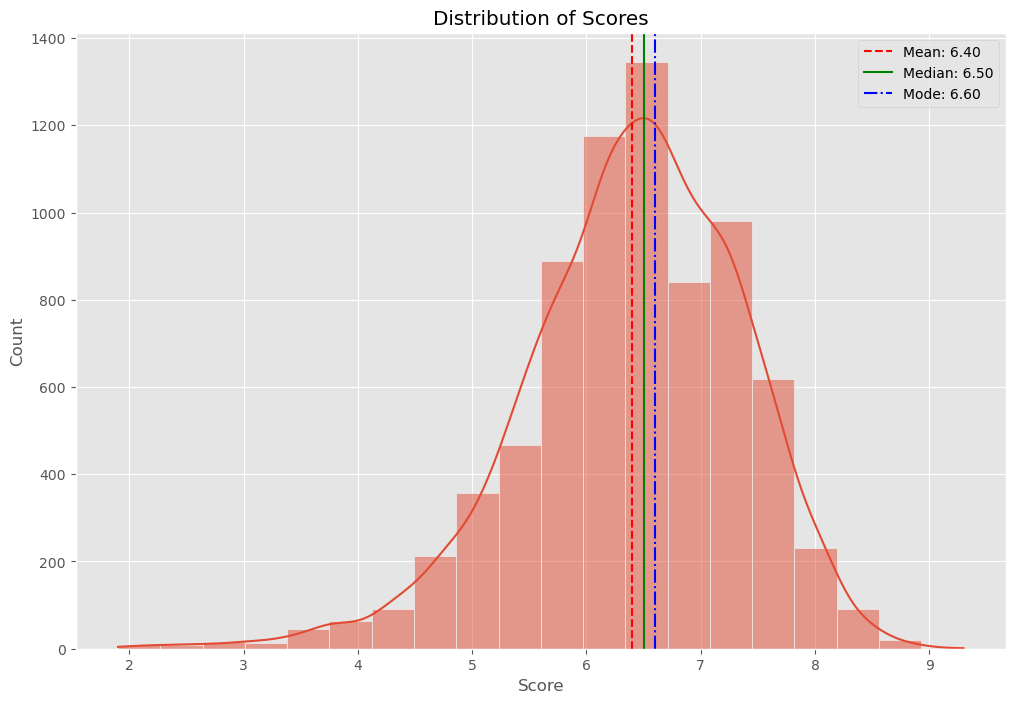

In [184]:
sns.histplot(df['score'], bins=20, kde=True)

plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='-', label=f'Median: {median_score:.2f}')
plt.axvline(mode_score, color='blue', linestyle='-.', label=f'Mode: {mode_score:.2f}')

plt.xlabel('Score')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Scores')
plt.show()

**Score của tập dữ liệu bị lệch trái (negative skewed)**

mean < median < mode

- Nguyên nhân:
    + Tính thiên vị đánh giá: Người dùng thường chấm điểm cao hơn là thấp.
    + Phim chất lượng thì được đánh giá nhiều và ngược lại
    + Hệ thống đánh giá có giới hạn dưới là 1, không có điểm âm.
    + Ảnh hưởng từ fan hâm mộ, fan có thể chấm điểm cao quá mức, anti-fan có thể chấm thấp.

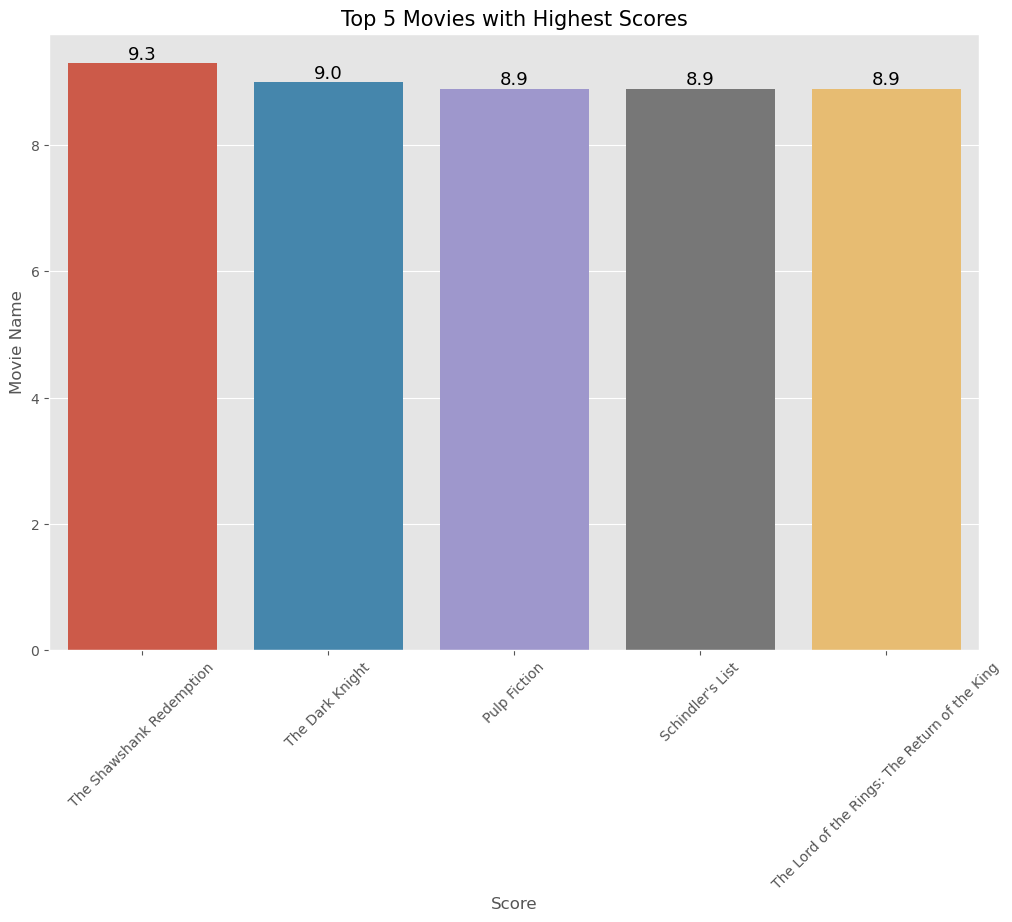

In [127]:
top_5_movies = df[['name', 'score']].sort_values(by='score', ascending=False).head(5)

ax = sns.barplot(x='name', y='score', data=top_5_movies)
for p in ax.patches:
    ax.annotate(f'{float(p.get_height())}',  # Giá trị count
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Vị trí nhãn
                ha='center', va='bottom', fontsize=13, color='black')

plt.xticks(rotation=45)
plt.xlabel('Score')
plt.ylabel('Movie Name')
plt.title('Top 5 Movies with Highest Scores',fontsize = 15)
plt.show()

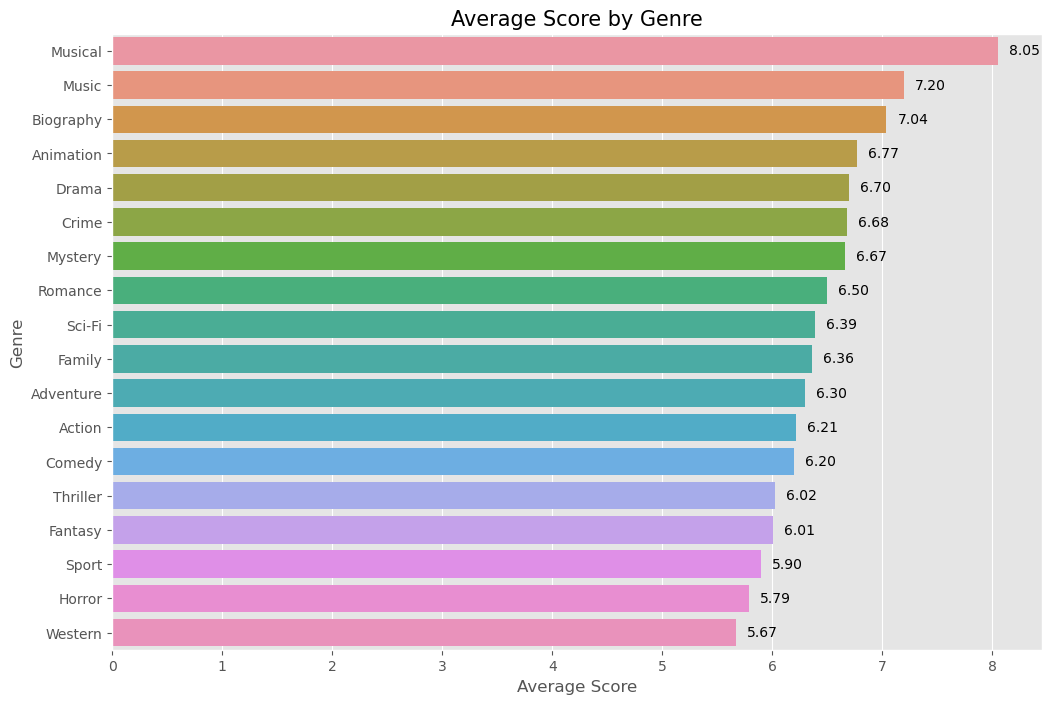

In [128]:
average_score_by_genre = df.groupby('genre')['score'].mean().sort_values(ascending=False)

sns.barplot(x=average_score_by_genre.values, y=average_score_by_genre.index)
for i, v in enumerate(average_score_by_genre.values):
    plt.text(v + 0.1, i, f'{v:.2f}', ha='left', va='center', fontsize=10)

plt.xlabel('Average Score')
plt.ylabel('Genre')
plt.title('Average Score by Genre',fontsize = 15)
plt.show()

#### votes

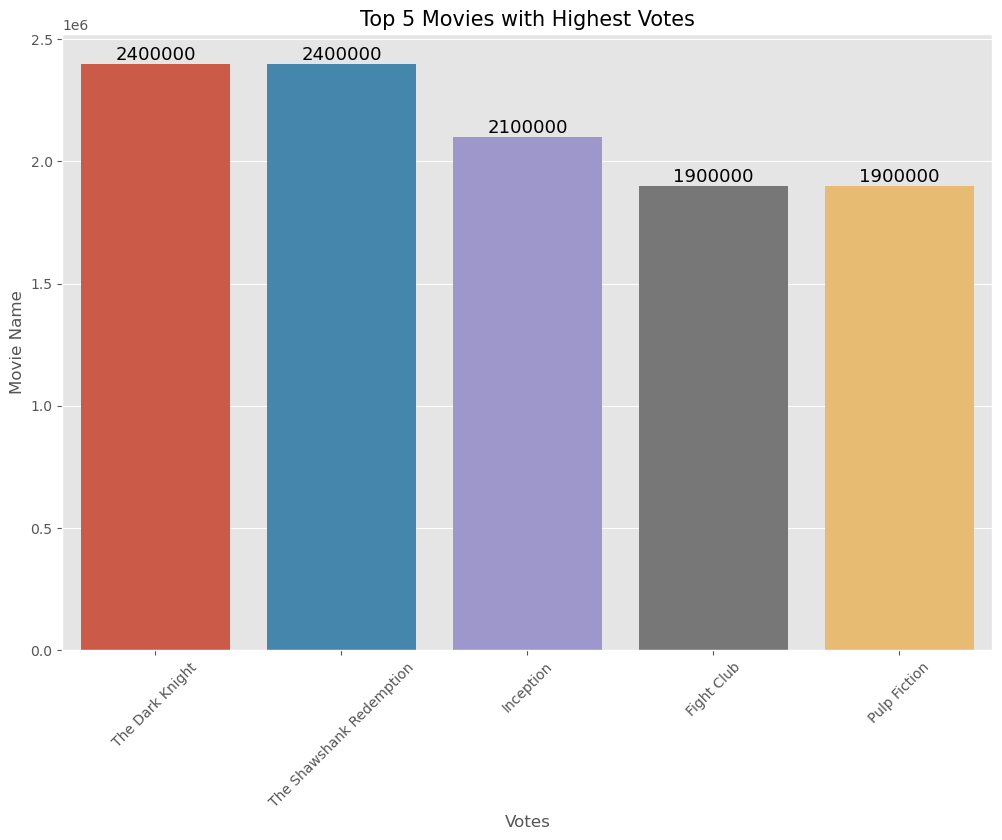

In [129]:
top_5_movies = df[['name', 'votes']].sort_values(by='votes', ascending=False).head(5)

ax = sns.barplot(x='name', y='votes', data=top_5_movies)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Giá trị count
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Vị trí nhãn
                ha='center', va='bottom', fontsize=13, color='black')

plt.xticks(rotation=45)
plt.xlabel('Votes')
plt.ylabel('Movie Name')
plt.title('Top 5 Movies with Highest Votes',fontsize = 15)
plt.show()

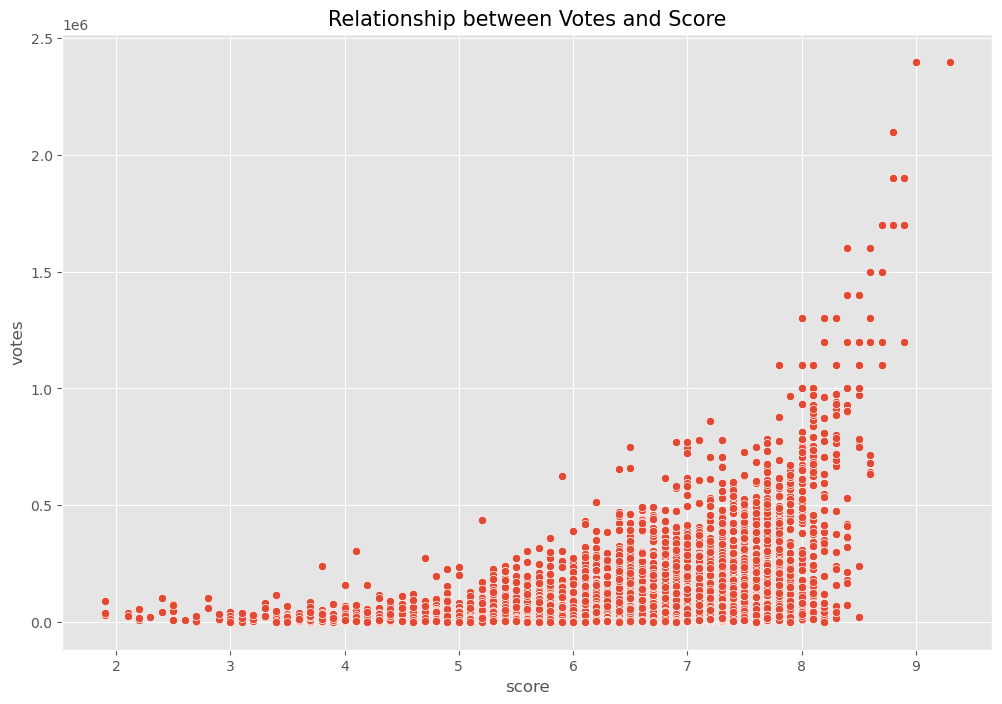

In [143]:
sns.scatterplot(x = 'score', y = 'votes', data = df)
plt.title('Relationship between Votes and Score',fontsize = 15)
plt.show()

- Các bộ phim có nhiều lượt bình chọn (votes) thường có điểm số (score) cao hơn, vì chỉ những phim được nhiều người quan tâm mới có nhiều đánh giá.
- Phim nổi tiếng, có chất lượng tốt thường thu hút nhiều người xem và đánh giá hơn.
- Phim ít votes thì Score có thể cao hoặc thấp một cách cực đoan.
- Phim phổ biến không phải lúc nào cũng có score cao, và ngược lại.

#### director

In [89]:
df['director'].value_counts().head(10)

Woody Allen          38
Clint Eastwood       31
Directors            27
Steven Spielberg     27
Ron Howard           24
Ridley Scott         23
Steven Soderbergh    23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Name: director, dtype: int64

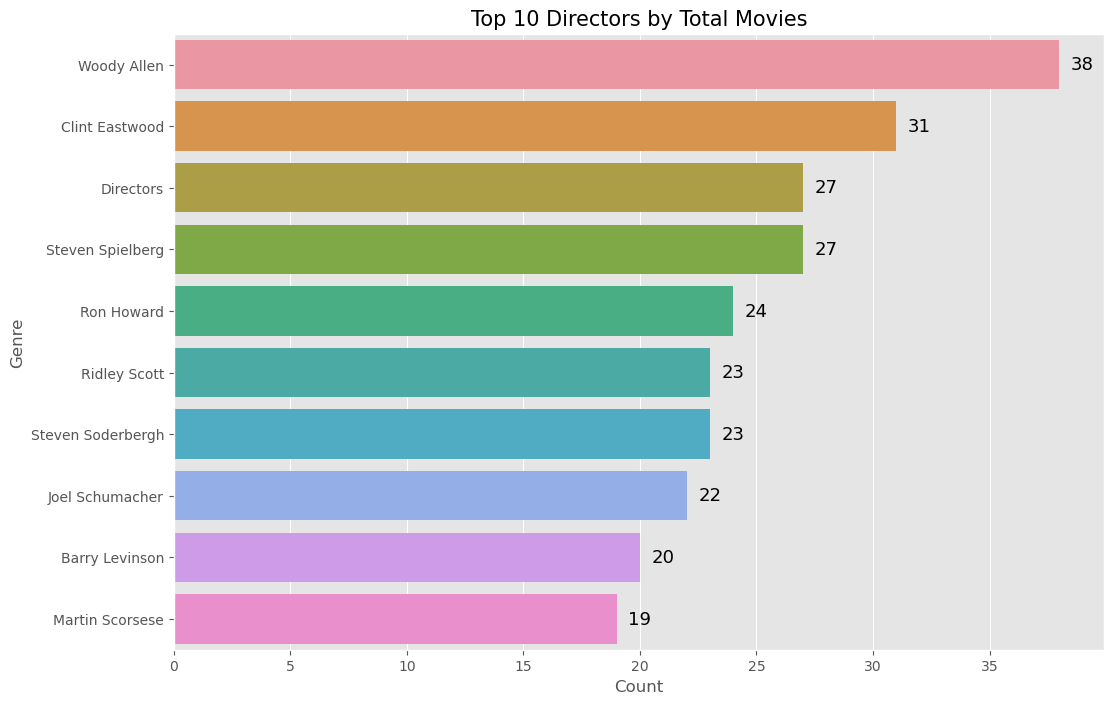

In [120]:
top_10_director = df['director'].value_counts().nlargest(10)
ax = sns.barplot(x=top_10_director.values, y=top_10_director.index)
for i, v in enumerate(top_10_director.values):
    ax.text(v + 0.5, i, str(v), ha='left', va='center', fontsize=13)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Directors by Total Movies',fontsize = 15)
plt.show()

#### writer

In [91]:
df['writer'].value_counts().head(10)

Woody Allen            37
Stephen King           31
Luc Besson             25
John Hughes            25
William Shakespeare    15
David Mamet            15
Pedro Almodóvar        13
Joel Coen              13
Wes Craven             12
Robert Rodriguez       11
Name: writer, dtype: int64

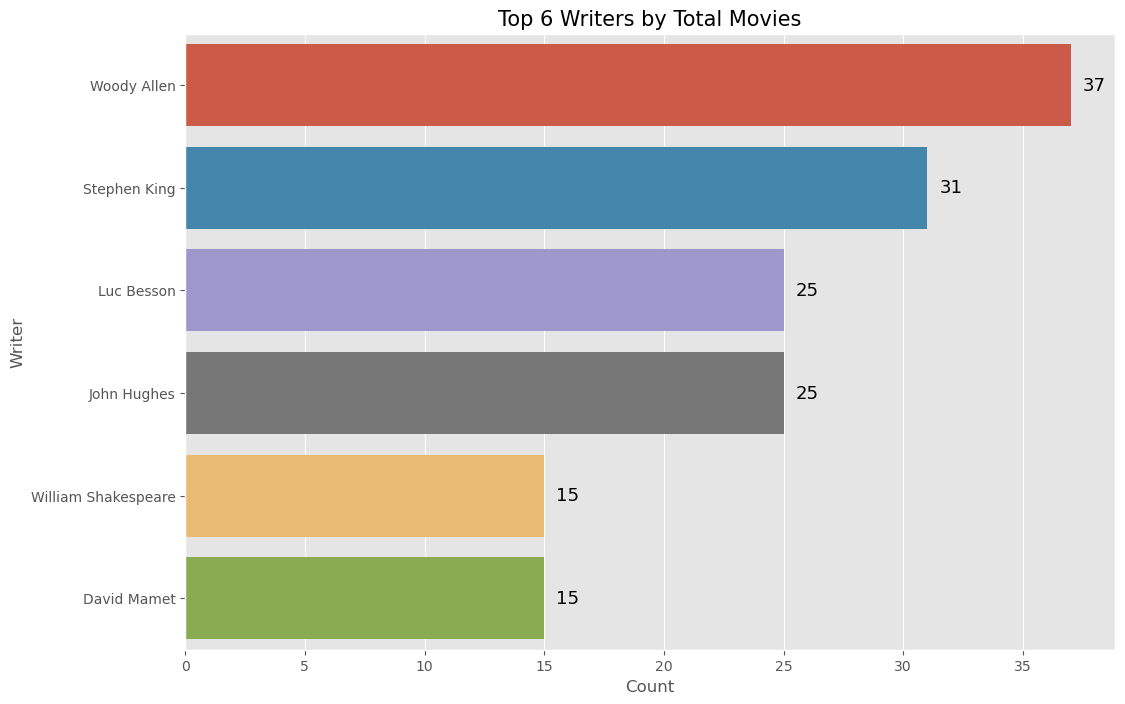

In [131]:
top_6_writer = df['writer'].value_counts().nlargest(6)
ax = sns.barplot(x=top_6_writer.values, y=top_6_writer.index)
for i, v in enumerate(top_6_writer.values):
    ax.text(v + 0.5, i, str(v), ha='left', va='center', fontsize=13)
plt.xlabel('Count')
plt.ylabel('Writer')
plt.title('Top 6 Writers by Total Movies',fontsize = 15)
plt.show()

#### star

In [93]:
df['star'].value_counts().head(10)

Nicolas Cage          43
Tom Hanks             41
Robert De Niro        41
Denzel Washington     37
Tom Cruise            34
Bruce Willis          34
Johnny Depp           33
Sylvester Stallone    32
John Travolta         30
Kevin Costner         29
Name: star, dtype: int64

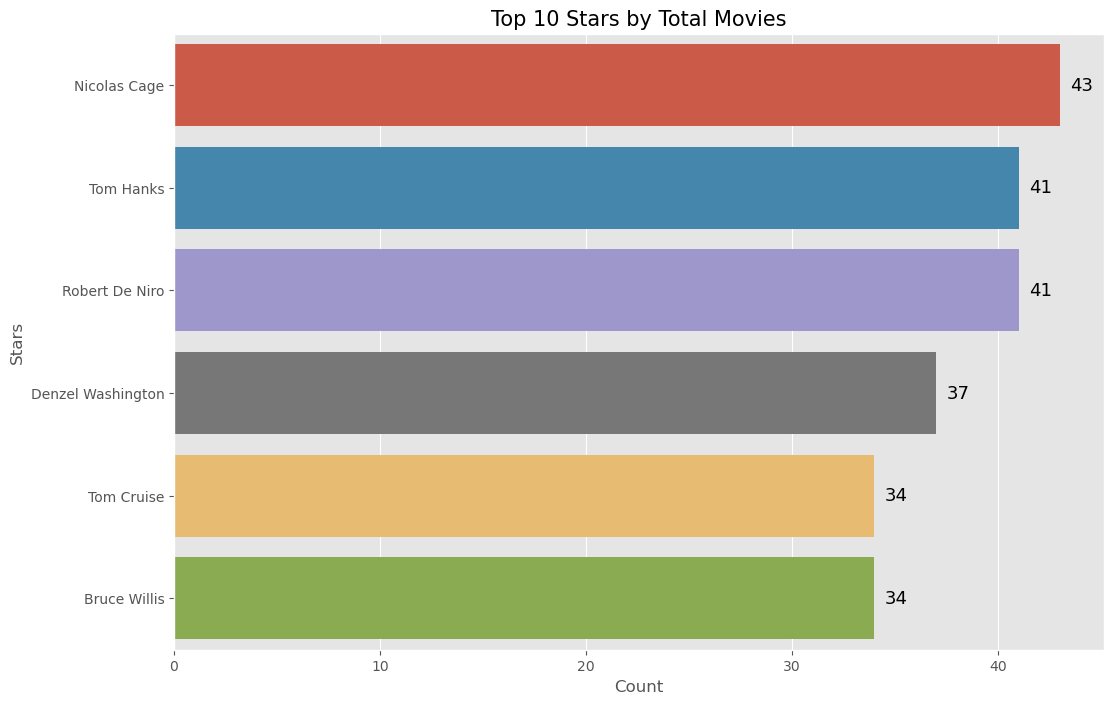

In [134]:
top_10_star = df['star'].value_counts().nlargest(6)
ax = sns.barplot(x=top_10_star.values, y=top_10_star.index)
for i, v in enumerate(top_10_star.values):
    ax.text(v + 0.5, i, str(v), ha='left', va='center', fontsize=13)
plt.xlabel('Count')
plt.ylabel('Stars')
plt.title('Top 10 Stars by Total Movies',fontsize = 15)
plt.show()

#### country

In [95]:
(df['country'].value_counts() / df.shape[0] * 100).apply(lambda x: f"{x:0.2f} %").head(10)

United States     71.93 %
United Kingdom    10.65 %
France             3.51 %
Canada             2.45 %
Germany            1.55 %
Australia          1.15 %
Japan              1.02 %
India              0.79 %
Italy              0.76 %
Spain              0.59 %
Name: country, dtype: object

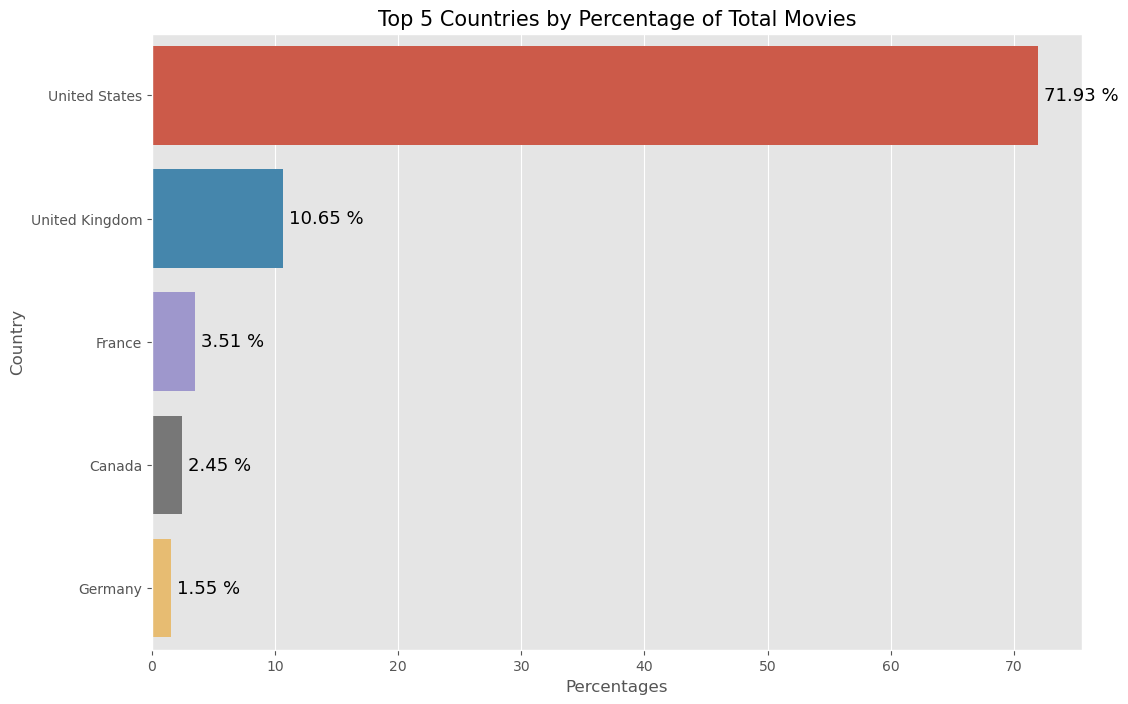

In [144]:
top_5_country = (df['country'].value_counts() / df.shape[0] * 100).head(5)
ax = sns.barplot(x=top_5_country.values, y=top_5_country.index)
for i, v in enumerate(top_5_country.values):
    ax.text(v + 0.5, i, f"{v:.2f} %", ha='left', va='center', fontsize=13)
plt.xlabel('Percentages')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage of Total Movies',fontsize = 15)
plt.show()

#### company

In [97]:
df['company'].value_counts().head(10)

Universal Pictures           386
Warner Bros.                 333
Columbia Pictures            332
Paramount Pictures           319
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    123
Walt Disney Pictures         123
TriStar Pictures              94
Name: company, dtype: int64

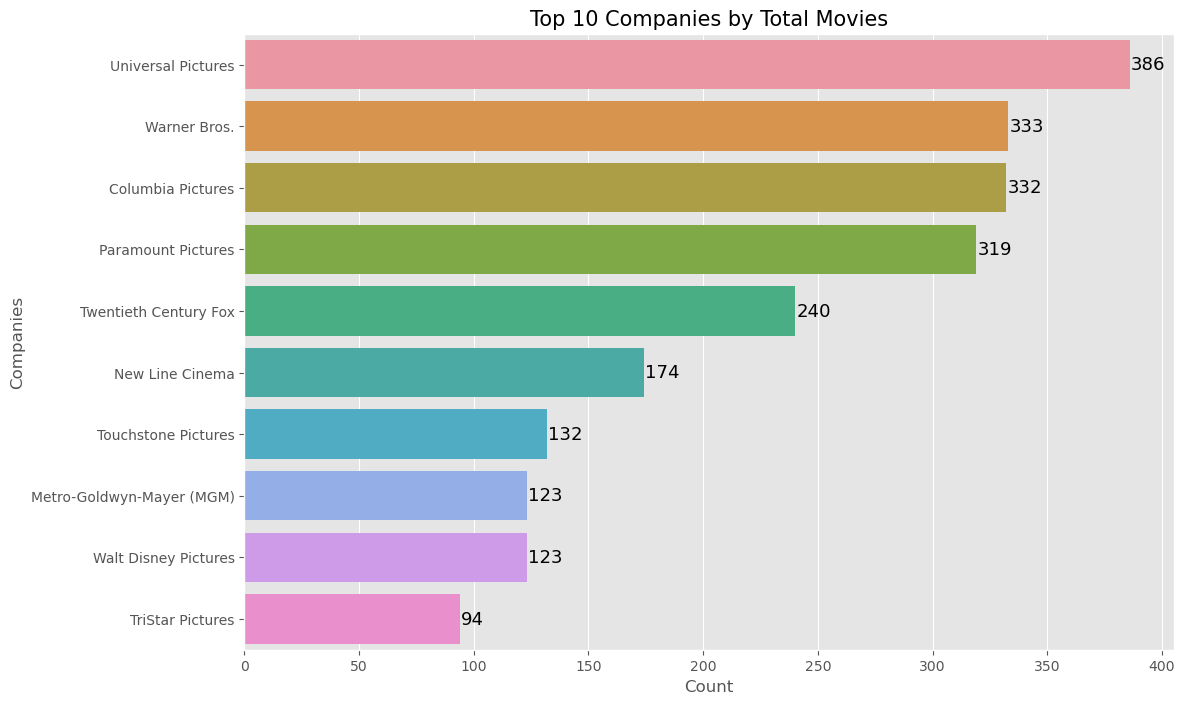

In [136]:
top_10_company = df['company'].value_counts().nlargest(10)
ax = sns.barplot(x=top_10_company.values, y=top_10_company.index)
for i, v in enumerate(top_10_company.values):
    ax.text(v + 0.5, i, str(v), ha='left', va='center', fontsize=13)
plt.xlabel('Count')
plt.ylabel('Companies')
plt.title('Top 10 Companies by Total Movies',fontsize = 15)
plt.show()

#### runtime

In [186]:
mean_runtime = df['runtime'].mean()
median_runtime = df['runtime'].median()
mode_runtime = df['runtime'].mode()[0]

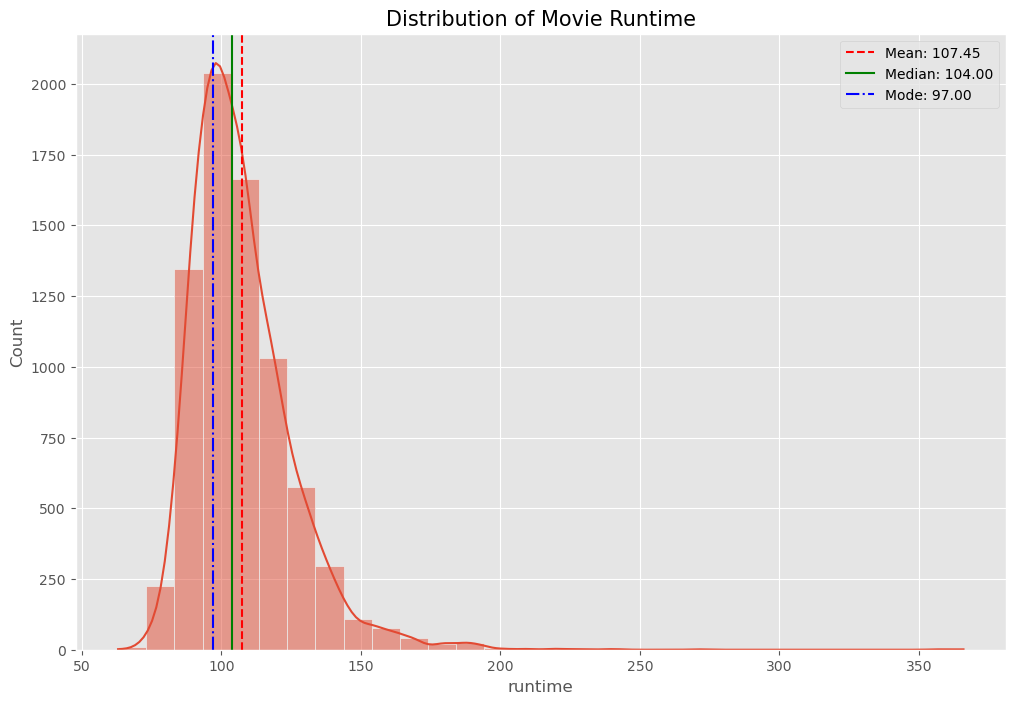

In [188]:
sns.histplot(df['runtime'], bins=30, kde=True)

plt.axvline(mean_runtime, color='red', linestyle='--', label=f'Mean: {mean_runtime:.2f}')
plt.axvline(median_runtime, color='green', linestyle='-', label=f'Median: {median_runtime:.2f}')
plt.axvline(mode_runtime, color='blue', linestyle='-.', label=f'Mode: {mode_runtime:.2f}')

plt.legend()
plt.title("Distribution of Movie Runtime",fontsize = 15)
plt.show()

**Dữ liệu runtime bị lệch phải (positive skewed)**

- mean > median > mode cho thấy có một số ít phim có thời gian dài bất thường, kéo điểm trung bình lên cao.

- Nguyên nhân:
    + Các phim bom tấn hoặc phim dài kỳ (ví dụ: The Lord of the Rings, Titanic, hoặc các phim hành động dài) có thể làm thời gian trung bình cao hơn so với phần lớn phim khác.
    + Thời gian phim hành động, phim chiến tranh, và phim siêu anh hùng có xu hướng dài hơn, trong khi các phim hài, lãng mạn thường ngắn hơn. Các thể loại này có thể làm tăng số lượng phim dài trong tập dữ liệu.

#### budget & gross

In [101]:
df[['name', 'gross']].sort_values(by='gross', ascending=False).head(10)

,name,gross
5445,Avatar,2847246203
7445,Avengers: Endgame,2797501328
3045,Titanic,2201647264
6663,Star Wars: Episode VII - The Force Awakens,2069521700
7244,Avengers: Infinity War,2048359754
7480,The Lion King,1670727580
6653,Jurassic World,1670516444
6043,The Avengers,1518815515
6646,Furious 7,1515341399
7494,Frozen II,1450026933


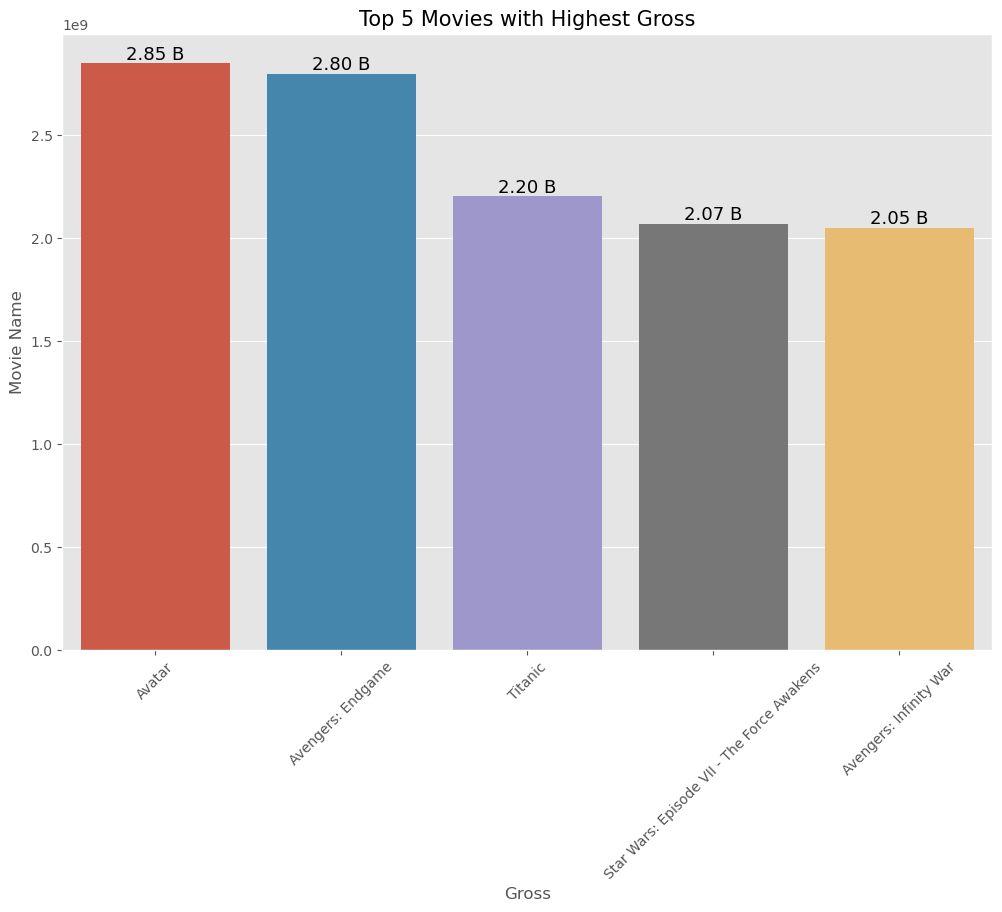

In [138]:
top_5_movies = df[['name', 'gross']].sort_values(by='gross', ascending=False).head(5)

ax = sns.barplot(x='name', y = 'gross', data=top_5_movies)
for p in ax.patches:
    ax.annotate(f'{p.get_height()/ 1e9:.2f} B',  # Giá trị count
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Vị trí nhãn
                ha='center', va='bottom', fontsize=13, color='black')
plt.xticks(rotation=45)
plt.xlabel('Gross')
plt.ylabel('Movie Name')
plt.title('Top 5 Movies with Highest Gross',fontsize = 15)
plt.show()

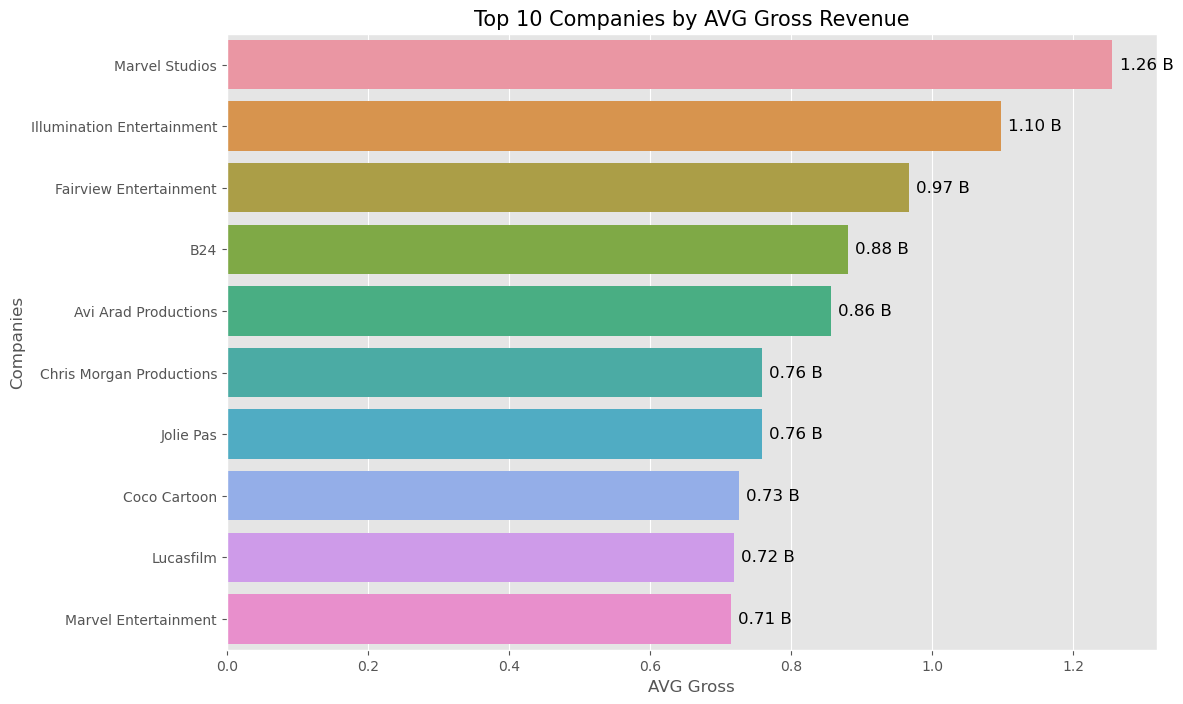

In [139]:
average_gross_by_company = df.groupby('company')['gross'].mean().sort_values(ascending=False).head(10) / 1e9

sns.barplot(x=average_gross_by_company.values, y=average_gross_by_company.index)
for i, v in enumerate(average_gross_by_company.values):
    plt.text(v + 0.01, i, f'{v:.2f} B', ha='left', va='center', fontsize=12)

plt.xlabel('AVG Gross')
plt.ylabel('Companies')
plt.title("Top 10 Companies by AVG Gross Revenue",fontsize = 15)
plt.show()

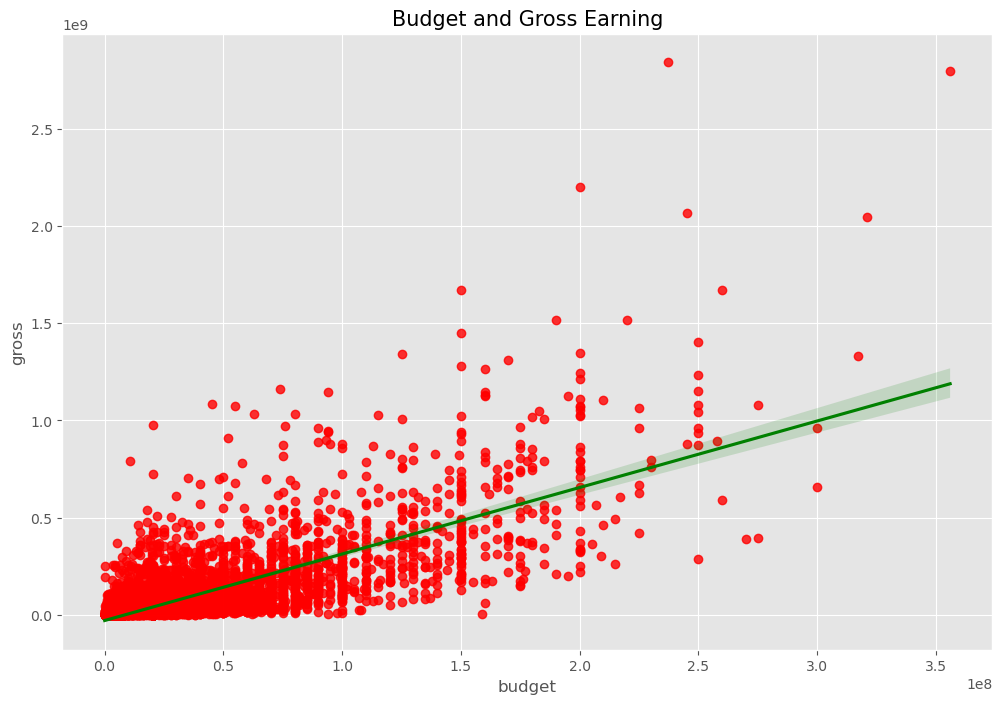

In [140]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'green'})
plt.title('Budget and Gross Earning',fontsize = 15)
plt.show()

**Budget vs Gross**
- Mối quan hệ dương: Ngân sách lớn thường đi kèm với doanh thu cao hơn. Các bộ phim có ngân sách cao (ví dụ: bom tấn Hollywood) có xu hướng có doanh thu phòng vé cao.
- Tuy nhiên không phải lúc nào cũng chính xác: Một số phim có ngân sách cao nhưng doanh thu không như kỳ vọng, và ngược lại. Ví dụ: phim có ngân sách khủng nhưng nội dung yếu sẽ không thu hút được khán giả, hoặc những phim có ngân sách thấp nhưng lại thành công vang dội (ví dụ: The Blair Witch Project).
- Sự phân bố không đồng đều: Các điểm dữ liệu sẽ có sự phân tán rộng. Một số ít bộ phim với ngân sách rất cao có thể có doanh thu cực kỳ lớn, trong khi những bộ phim có ngân sách nhỏ có thể vẫn đạt doanh thu lớn nếu thu hút được người xem.

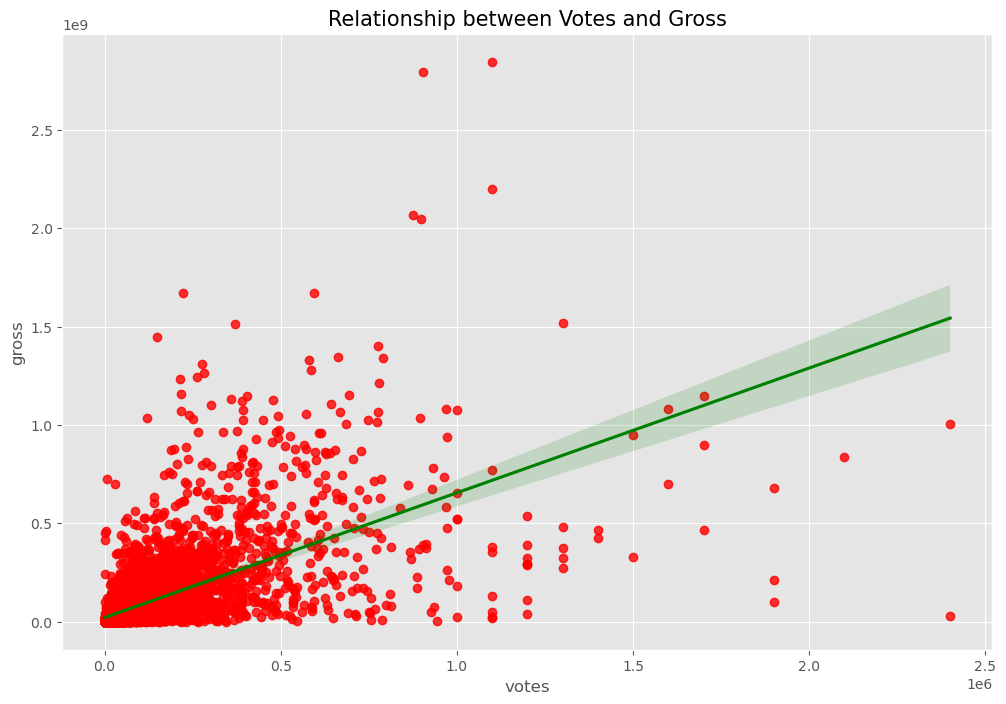

In [142]:
sns.regplot(x = 'votes', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'green'})
plt.title('Relationship between Votes and Gross',fontsize = 15)
plt.show()

**Votes vs Gross**
- Mối quan hệ dương nhẹ: 
    + Phim có nhiều lượt đánh giá (votes) thường có doanh thu lớn hơn, vì những phim phổ biến, được nhiều người xem sẽ có nhiều đánh giá hơn.
    + Votes cao thể hiện phim có được sự chú ý từ công chúng, thường là các phim bom tấn hoặc phim có fanbase lớn, dẫn đến doanh thu lớn.
- Tuy nhiên không phải lúc nào cũng chính xác: sự có mặt của phim cult hoặc các phim "ngách" (niche) có thể có votes ít nhưng vẫn có doanh thu cao, hoặc ngược lại, phim có số lượng đánh giá lớn nhưng doanh thu không tương xứng.
- Hiệu ứng truyền thông và quảng cáo: Phim có nhiều lượt votes có thể là do chiến dịch quảng cáo mạnh mẽ, sự kiện ra mắt lớn, hoặc lượng fan trung thành đông đảo, điều này giúp phim đạt được doanh thu cao.
- Tăng khả năng dự đoán doanh thu: Lượt đánh giá có thể giúp ước tính được phần nào sự thành công của phim, vì một phim được đánh giá cao sẽ có khả năng thu hút khán giả tốt hơn, dẫn đến doanh thu cao.

#### Có thể thấy rằng "Biểu đồ scatter" giúp ta nhận diện các mối quan hệ và tìm ra outliers (ngoại lệ) giúp hiểu rõ hơn về sự thành công của một bộ phim.